#One-Hot-Encoding Preprocessing
As previously indicated, the utilized dataset incorporates isomeric SMILES, a distinctive representation of 2D chemical information, which is transformed into one-hot-encoding matrices.<br>
<br>
Example of a compound within the dataset:<br>
<b>Name</b>: 1,1,1-Triphenylethane<br>
<b>CAS/CID</b>: 5271-39-6 / 78926 <br>
<b>Isomeric SMILES</b>: CC(C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3 <br>
<br>
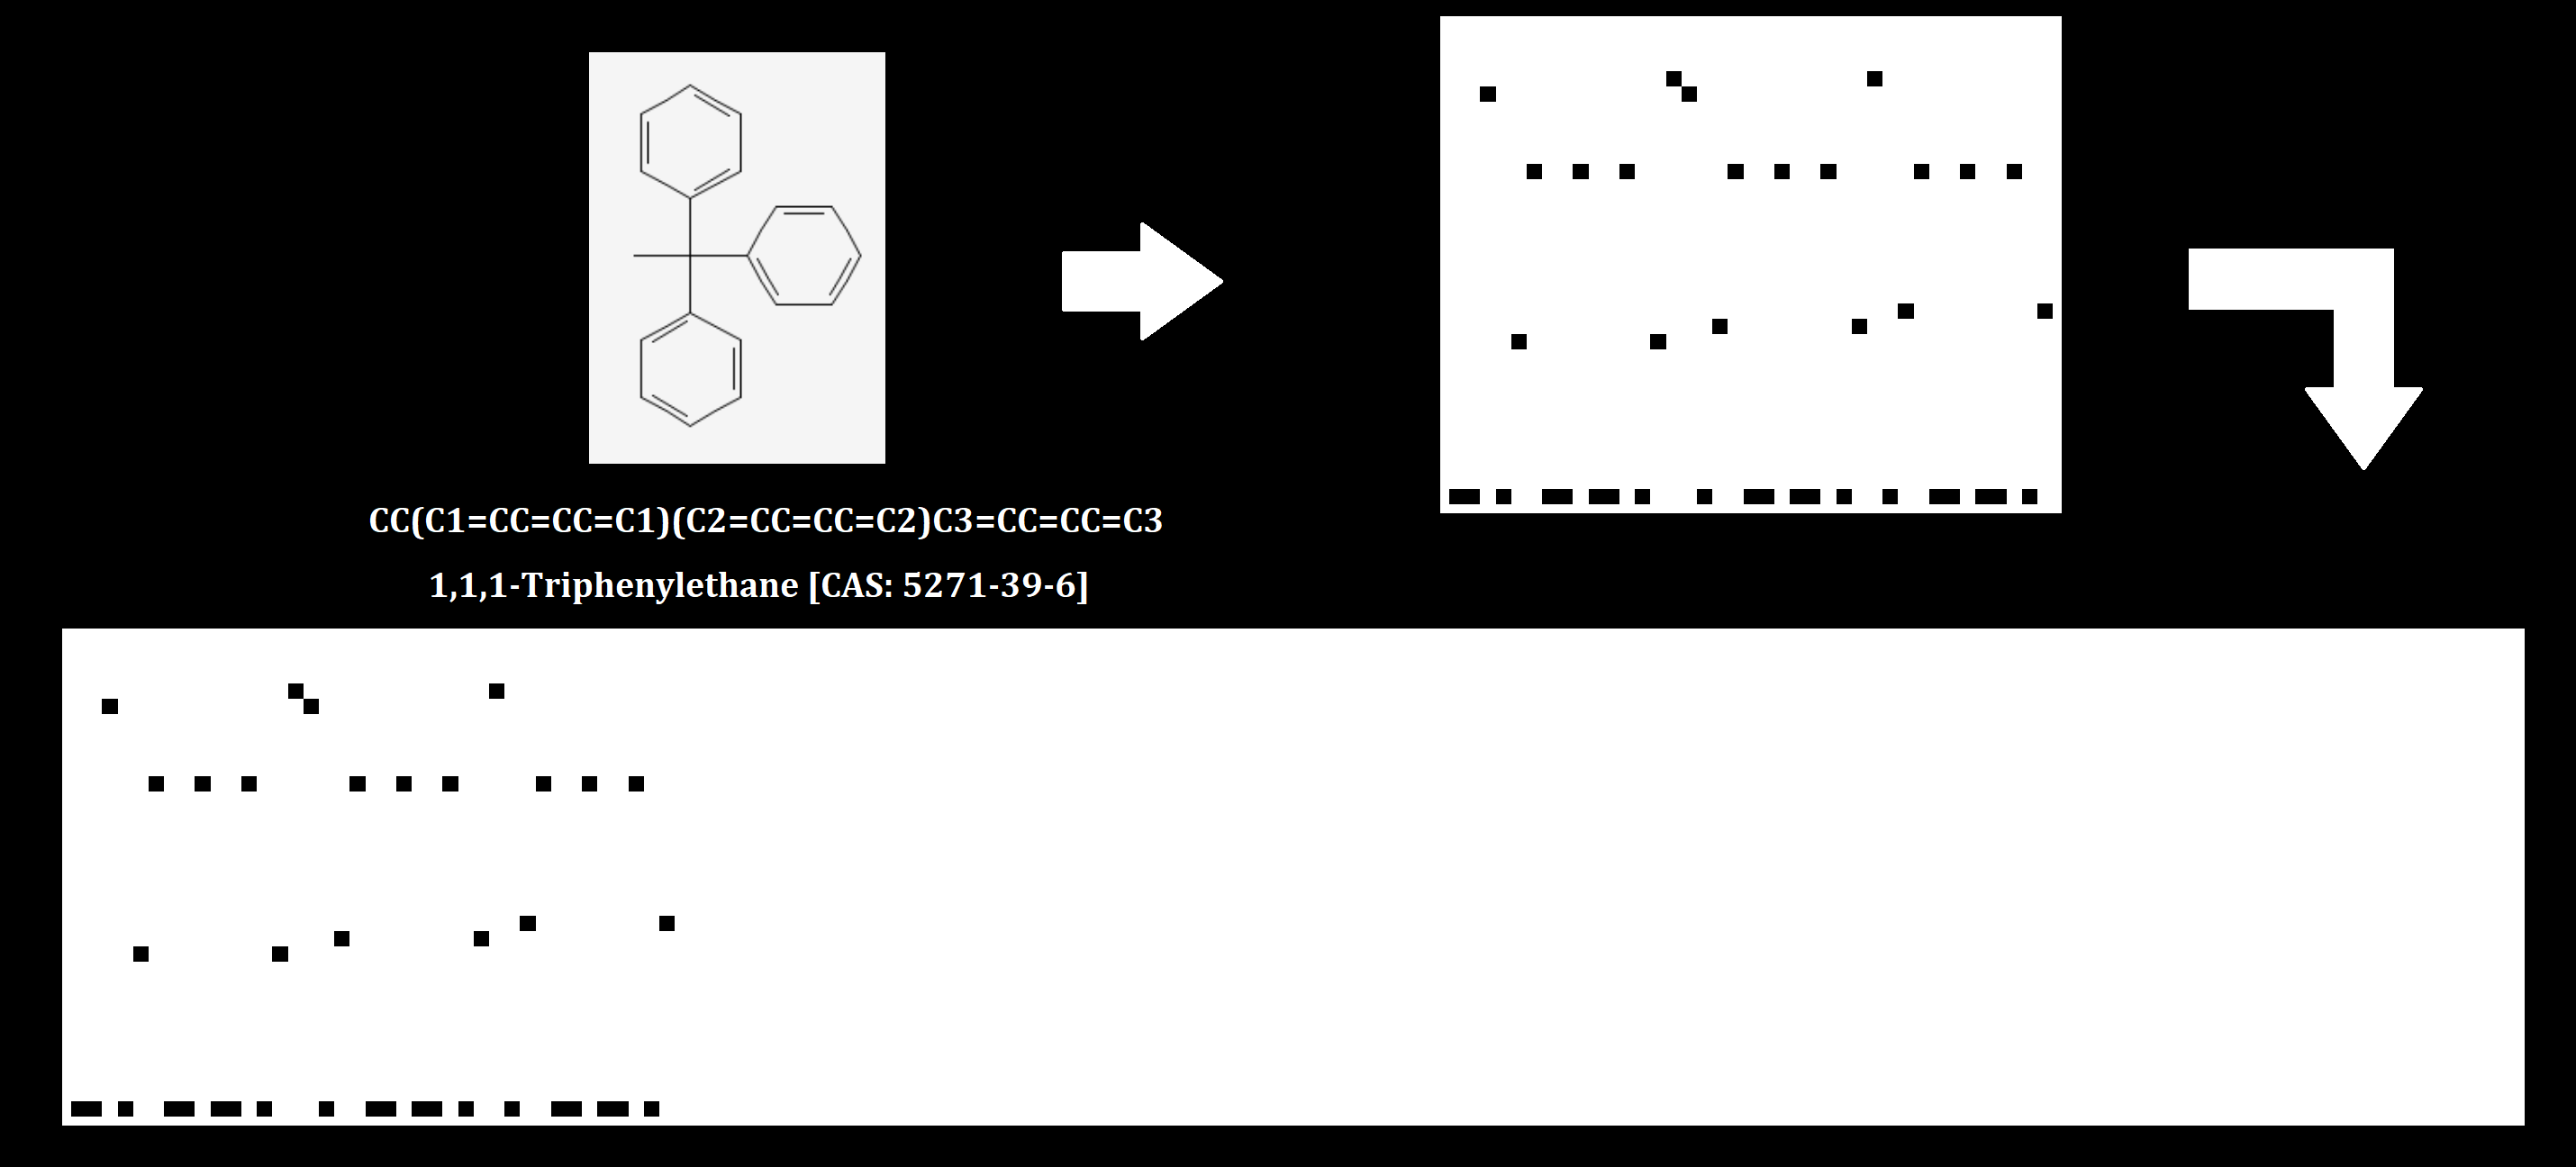
<p align="center"><b>Figure 1</b>: Steps in the Preprocessing Process for One-Hot Encoding</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
from pandas.core.arrays.string_arrow import BaseStringArray
# Read the thermodynamic dataset (CSV file)
data_frame = pd.read_csv('/content/thermodynamic_dataset.csv')
# Extract columns and store them in numpy arrays
chemical_smiles = np.array(data_frame['IsomericSMILES'])
CAS = np.array(data_frame['CAS'])

In [ ]:
# Create a folder to store ".npy" files if it does not exist
folder_path = 'NPY'
if not os.path.exists(folder_path):
  os.makedirs(folder_path)
  print(f"Folder created at '{folder_path}'")
else:
  print(f"Folder already exists at '{folder_path}'")

Folder created at 'NPY'


While maintaining uniform input dimensions, the size is determined by the longest SMILES sequence within the dataset.

In [ ]:
#Find the longest SMILES and count its characters:
longest_smile = max(chemical_smiles, key=len)
character_count = len(longest_smile)
print("Longest SMILES:", longest_smile)
print("Character Count of the longest SMILES:", character_count)

Longest SMILES: O(C(C)=O)C1C2C(COC(C)=O)OC(C1OC(C)=O)OC3C(OC(C)=O)C(OC(C)=O)C(OC3COC(C)=O)OC4C(OC(C)=O)C(OC(C)=O)C(OC4COC(C)=O)OC5C(OC(C)=O)C(OC(C)=O)C(OC6C(OC(C)=O)C(OC(C)=O)C(OC7C(OC(C)=O)C(OC(C)=O)C(OC8C(OC(C)=O)C(OC(C)=O)C(O2)OC8COC(C)=O)OC7COC(C)=O)OC6COC(C)=O)OC5COC(C)=O
Character Count of the longest SMILES: 261


Isomeric SMILES might include atoms represented with two characters. During the preprocessing steps, specific atoms, such as Chlorine (Cl) and Barium (Br), are abbreviated to single characters like L and R (respectively). Compounds containing these atoms are generally less common in the dataset, given that this study primarily focuses on C-H-N-O-S-P atoms.

In [ ]:
# Define a function to replace 'Cl' with 'L' and 'Br' with 'R'
def replace_cl_br(smiles_array):
    # Create a new array to store the modified SMILES
    modified_smiles = np.empty_like(smiles_array, dtype='object')
    # Iterate over each element in the smiles array
    for idx, smile in enumerate(smiles_array):
        # Check if 'Cl' is present in the current SMILES
        if 'Cl' in smile:
          smile = smile.replace('Cl', 'L')
        # Check if 'Br' is present in the current SMILES
        if 'Br' in smile:
          smile = smile.replace('Br', 'R')
        # Save the modified SMILES in the new array
        modified_smiles[idx] = smile
    return modified_smiles
# Call the function to modify the chemical_smiles array
modified_chemical_smiles = replace_cl_br(chemical_smiles)

After the character replacements, the one-hot-encoding matrices (with values of 0 or 1) are generated. Subsequently, zero-padding is employed for all remaining compounds, as illustrated in Fig. 1.

In [ ]:
# List of all necessary characters of SMILES to encode in one-hot format
parameters = ['C', 'H', 'N', 'O', 'S', 'P', 'F', 'I', 'L', 'R', '1', '2', '3', '4', '5', '6', '7', '8', '9', '\\', '/', '=', '#', '.', '[', ']', '(', ')', '+', '-', '@']
# Loop through each SMILES in the 'chemical_smiles' array
for i in range(0, len(chemical_smiles)):
  chemical_smiles_n = chemical_smiles[i]  # Extract the SMILES at index i
  num_parameters = len(parameters)  # Calculate the number of parameters for one-hot-encoding
  # Initialize a zero-padding one-hot encoding array with the shape (character_count, num_parameters)
  one_hot_encoding = np.zeros((character_count, num_parameters), dtype=int)
  # Loop through each character in the current SMILES
  for j in range(len(chemical_smiles_n)):
    character = chemical_smiles_n[j]  # Extract the character at index j
    if character in parameters:
      parameter_index = parameters.index(character)  # Find the index of the character in 'parameters'
      one_hot_encoding[j, parameter_index] = 1  # Set the corresponding entry in the one-hot encoding array to 1
    # Generate the file path to save the one-hot encoded array as an NPY file
    file_path = folder_path + '/' + CAS[i] + '.npy'
    # Reshape the one-hot encoding array to have dimensions (character_count, num_parameters, 1)
    one_hot_encodingre = np.reshape(one_hot_encoding, [character_count, num_parameters, 1])
    # Save the one-hot encoded array as an NPY file
    np.save(file_path, one_hot_encodingre)

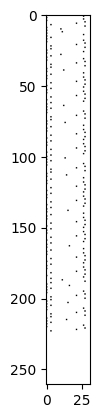

In [ ]:
# Import the numpy array of one-hot-encoding data
num_ohe_data = 0
data = np.load('/content/NPY/'+CAS[num_ohe_data]+'.npy')
# Create a heatmap of the numpy array using Matplotlib
plt.imshow(data, cmap='binary')
# Show the plot
plt.show()